# K-means clustering - introduction

Le but de l'entrainement d'un algorithme de machine learning est de pouvoir réaliser des prédictions, sur des états pour lesquels ont n'a pas les données. Souvent, c'est pour prédire une situation future, mais aussi un cas dans l'espace des possibilités, peu importe s'il a déjà eu lieu ou pas (l'exemple typique ce sont les chatbots, qui doivent répondre à de très nombreux cas).

L'entrainement d'un algorithme de machine learning ne suffit pas : il faut le tester.

Pour cela, on sépare les données disponibles en deux (ou trois jeux de données) :

- le jeu d'entrainement : le modèle va être ajusté sur ces données
- le jeu de test : les données de test vont permettre de mesurer la précision de l'ajustement obtenu.
- le jeu de validation apporte un raccourci pour ajuster les hyper-paramètres (comme le nombre de clusters cf ci-dessous). Nous n'en parlerons pas.

![](https://miro.medium.com/max/931/1*Nv2NNALuokZEcV6hYEHdGA.png)

Il est important de séparer son jeu de données en sous-jeux homogènes : il ne faut pas qu'une propriété soit sur-représentée dans l'un des deux. La librairie scikit-learn offre des outils pour la séparation des jeux de données et les propriétés intrinsèques du jeu de données sont à prendre en compte au cas par cas.

Il est aussi possible de ne pas séparer le jeu de données une fois pour toute, mais d'exécuter l'entrainement puis le test (ou la validation) en itérant de nombreuses fois et en séparant le jeu de données de manière différente à chaque fois.

En itérant 2 fois :

![](../../static/images/model-validation-2.png)

En itérant n fois : 

![](../../static/images/model-validation-n.png)

### K-means clustering avec le jeu de données Iris

L'algorithme K-means est un algorithme de Machine Learning non supervisé qui permet de classifier des points et d'identifier des patterns sous-jacents.

C'est l'un des algorithmes de clustering, parmi d'autres, dont le clustering hiérarchique.

Cet algorithme minimise la distance entre chaque point et le centre du cluster auquel il est associé. Si un autre centre de cluster s'avère plus proche, il est alors associé à l'autre centre de cluster.

Voici le processus itératif :

1. choisir un nombre de clusters à établir
2. initialiser ces centroïdes
3. assigner chaque point à un centroïde, produisant les clusters mais imprécis
4. calculer les nouveau centre de chaque cluster
5. assigner chaque point au centroïde de cluster le plus proche
6. reprendre à l'étape 4 jusqu'à ce que les centres de clusters soient stables sur un intervalle de précision 


#### Jeu de données Iris

Ce jeu de données a les qualités d'être très visuel et de contenir 4 dimensions, ce qui en fait un jeu de données très utilisé pour des exemples.

Le jeu de donnés iris contient 50 observations de chacune des trois espèces d'Iris (Iris setosa, Iris virginica and Iris versicolor), et 4 features (variables) : longueur et largeur des pétales et longueur et largeur des sépales.


##### Chargement des librairies

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

##### Chargement des données

In [2]:
iris = datasets.load_iris()

##### Définition de la réponse (y) et des features (X)

In [3]:
X = iris.data[:, :2]
y = iris.target

##### Visualisation des données

Text(0, 0.5, 'Largeur des sépales')

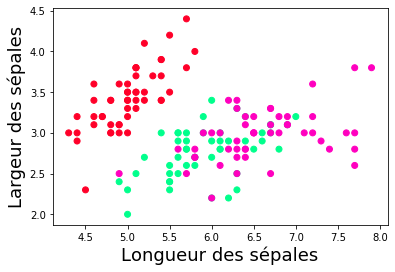

In [4]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Longueur des sépales', fontsize=18)
plt.ylabel('Largeur des sépales', fontsize=18)

#### Trame générique pour l'exécution d'algorithmes de machine learning 

1. Charger les librairies
2. Instantier un modèle (choix de l'algorithme)
3. Exécution du fit (ajustement)
4. Exécution d'une prédiction.

À l'œil, on peut être tenté·e·s de vouloir obtenir 3 clusters. Le nombre de clusters est à entrer par l'opérateur·ce.

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)

km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

##### Les centres de clusters sont des points dans l'espace à N dimensions

Ici 2 features (longueur et largeur des sépales), donc des points sur le plan à 2D.

In [6]:
centers = km.cluster_centers_
print(centers)

[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


In [7]:
x_centers = [item[0] for item in km.cluster_centers_]
y_centers = [item[1] for item in km.cluster_centers_]

##### Visualisation des résultats

Text(0.5, 1.0, 'Predicted')

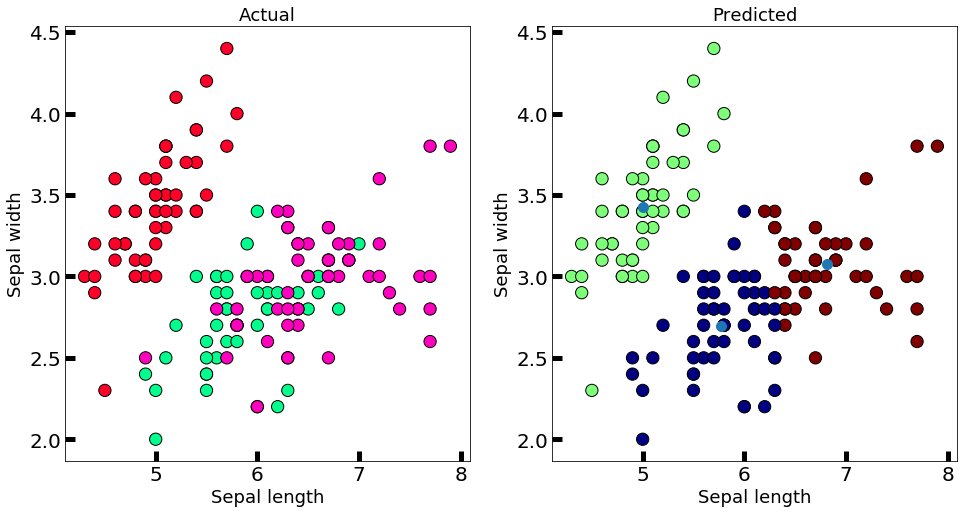

In [8]:
#this will tell us to which cluster does the data observations belong.

new_labels = km.labels_ # Plot the identified clusters and compare with the answers

fig, axes = plt.subplots(1, 2, figsize=(16,8))

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',edgecolor='k', s=150)

axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',edgecolor='k', s=150)

axes[1].scatter(x_centers, y_centers, s=100)

axes[0].set_xlabel('Sepal length', fontsize=18)

axes[0].set_ylabel('Sepal width', fontsize=18)

axes[1].set_xlabel('Sepal length', fontsize=18)

axes[1].set_ylabel('Sepal width', fontsize=18)

axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)

axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)

axes[0].set_title('Actual', fontsize=18)

axes[1].set_title('Predicted', fontsize=18)

#### Avantages et inconvénients de l'algorithme k-means

- (+) simplicité et rapidité d'exécution
- (+) très intuitif et aisément visualisable

- (-) très dépendant du nombre de dimensions et de moins en moins adapté lorsque ce nombre grandit
- (-) l'interprétation des résultats est plus accessible à l'humain qu'à la machine (ne produit pas de métriques aussi machine-usable que d'autres algors)

## k-Means clustering sur des données générées

In [9]:
!pip install seaborn

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

## Machine learning

L'algorithme k-Means clustering est un algorithme non-supervisé classifiant des points en clusters.

## Hyperparamètres

- nombre de clusters _k_ donné en entrée

## Hypothèses

- centre d'un cluster : c'est la moyenne arithmétique des positions des points du cluster
- chaque point est plus proche du centre du cluster dans lequel il est que des centres des autres cluster.

## Données

Pour l'exemple, prenons un jeu de données avec 4 groupes de points :

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


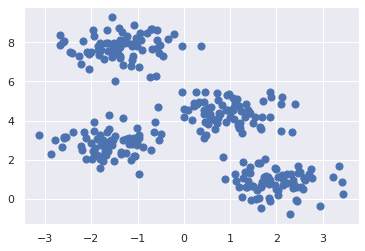

In [11]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

## Exécution de l'algo

In [12]:
from sklearn.cluster import KMeans # import de l'algorithme
kmeans = KMeans(n_clusters=4)      # instanciation avec les hyperparamètres
kmeans.fit(X)                      # exécution
y_kmeans = kmeans.predict(X)       # prédiction

## Visualisation des résultats

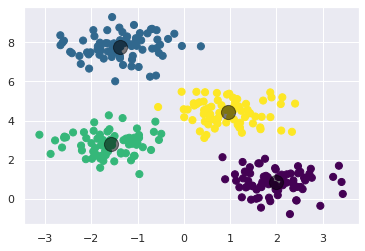

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Fonctionnement de l'algorithme k-Means

_Expectation-maximisation_

- faire une estimation de _k_ clusters
- répéter les étapes suivantes jusqu'à convergence :
    + Étape _E_ : assigner les points au centre de cluster le plus proche
    + Étape _M_ : calcul de la position du centre du cluster
    
(note : entre chaque étape, seul le centre de cluster calculé est conservé, l'attribution des points est retirée)


#### Limitation de l'algorithme k-means aux clusters à limites linéaires

Voici des données non catégorisées mais aisées à catégoriser à l'œil nu.

Le clustering est globalement concentrique.

In [14]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

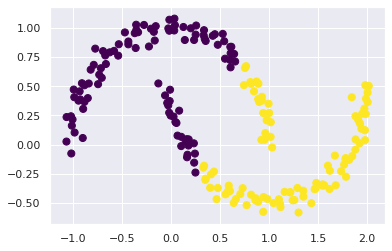

In [15]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

D'autres algorithmes permettent de prenre en compte cette forme de croissant

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


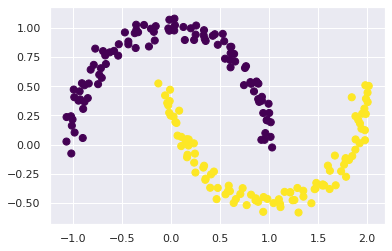

In [16]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

#### Usage possible de l'algorithme k-means

L'exemple de la compression est parlant et a un usage applicatif.

Voici une image.

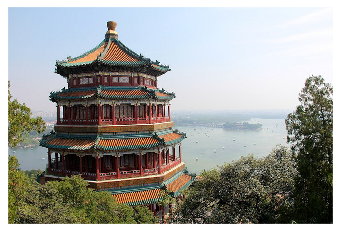

In [17]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [18]:
!pip install Pillow

Cette image est stockée dans un tableau avec des points en R,G,B

In [19]:
china.shape

(427, 640, 3)

Ces points peuvent être représentés dans un espace à 3 dimensions de couleurs, rouge, vert, bleu

On applique une échelle pour que les couleurs ne soient plus sur 255 mais sur 1.

In [20]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Pour que l'exécution soit plus efficace, on peut prendre un extrait de 10000 pixelsS

In [21]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);


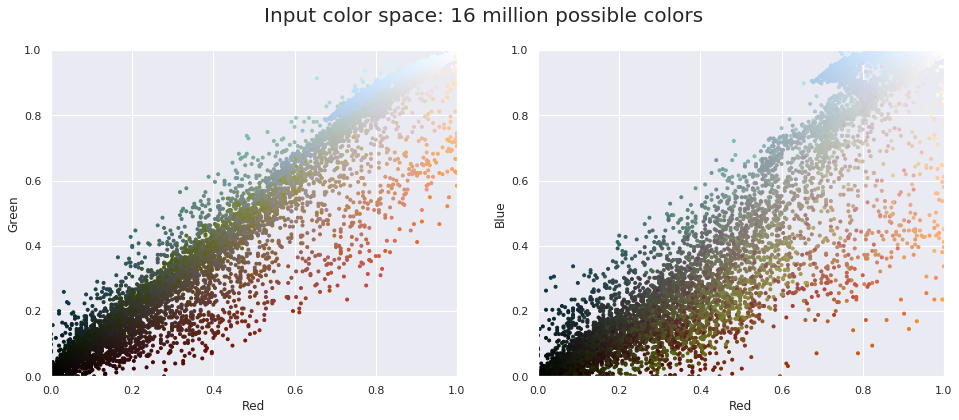

In [22]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Il y 16 millions de combinaisons R,G,B. On peut envisager de réduire ce nombre (ce qui est accessible par un clustering). Pour atteindre par exemple 16 couleurs.

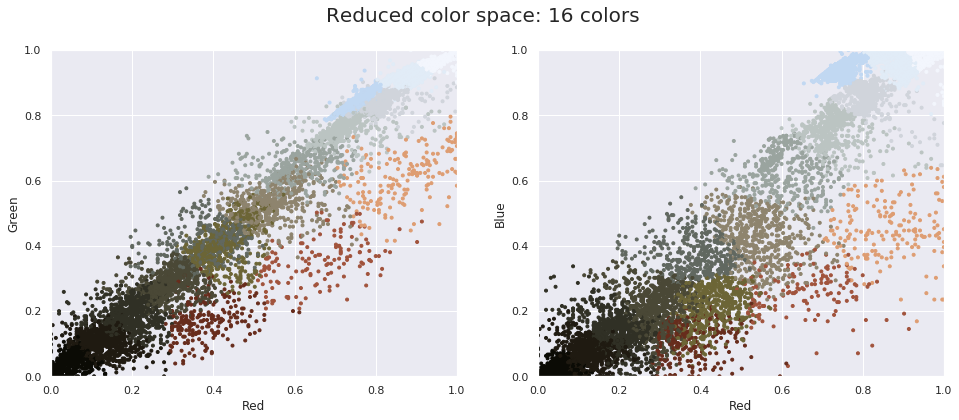

In [23]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

Le résultat est un tableau où les couleurs sont 

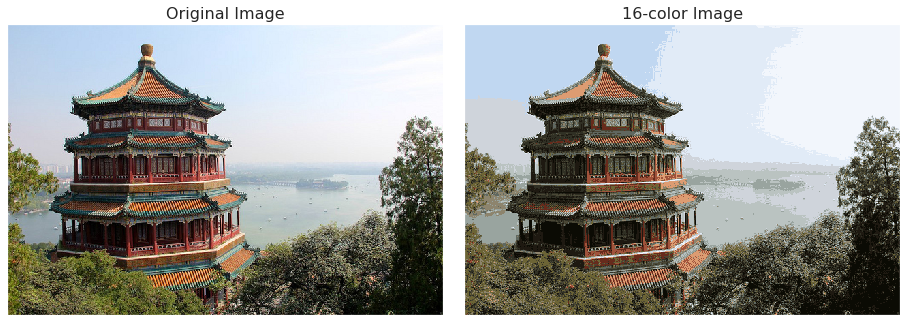

In [24]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

Une partie du détail est perdue (du fait de la moyenne obtenue par les clusters), mais ce qui a été perdu l'a été autour de valeurs moyennes, ce qui conserve la structure de l'image.

# Clustering hiérarchique

Le clustering par descente de gradient est une approche par agrégation : les points sont associés deux par deux, puis les 2 points sont associés au point le plus proche jusqu'à n'en n'avoir qu'un seul cluster.

Cet algorithme ne requiert aucune hypothèse, en particulier il n'y a pas de nombre de clusters à choisir.

La visualisation naturelle est un dendogramme (voir plus bas).

Le nombre de clusters optimal peut être obtenue par méthode graphique :

![](https://miro.medium.com/proxy/1*LBOReupihNEsI6Kot3Q6YQ.png)

La méthode agrégative simple n'est pas la seule, il y a aussi la méthode le _linkage_ : l'agrégation se fait entre clusters.

### Exemple

In [ ]:
import numpy as np

X = np.array([[5,3],  
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

## Visualisation des points

In [ ]:
import matplotlib.pyplot as plt

labels = range(1, 11)  
plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

## Réalisation du dendogramme pour ce jeu de données

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)

## Étapes de l'algorithme

- calcul des distances entre points et sélection des deux plus proches => classification de ces deux points dans un claster
- répétition entre un point et le centre d'un cluster

Les longueurs verticales représentent la distance entre les points.

## Example

In [ ]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  

## Jeu de données

In [ ]:
X = np.array([[5,3],  
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

## Exécution de l'algorithme

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)  

In [ ]:
print(cluster.labels_)  

Les premiers points sont dans le cluster 1 et les suivants dans le cluster 0.

In [ ]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')  